# Ishika Shah
# Data Science and Business Analytics Intern
# GRIP Foundation

## Predict the percentage of an student based on the no. of study hours. What will be predicted score if a student studies for 9.25 hrs/ day?

Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error

Taking given data

In [2]:
# reading data using url directly

url = "http://bit.ly/w-data"
data = pd.read_csv(url)

print(data.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


Plotting data

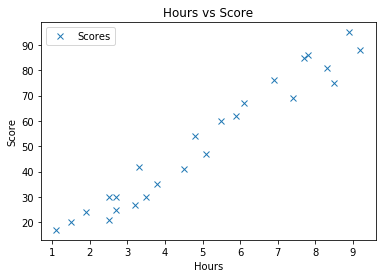

In [3]:
data.plot(x='Hours', y='Scores', style='x')  
plt.title('Hours vs Score')
plt.xlabel('Hours')
plt.ylabel('Score')  
plt.show()

Splitting data into X and y to carry on with the regressing

In [16]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

Splitting into training and testing data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0)

Defining Function to plot the actual v/s predicted value for each value of testing data and to see the mean sqaured error.

In [25]:
def plot_results(name, y, yhat, figsize=(6,6)):
    plt.figure(figsize=figsize)
    score = mean_squared_error(y, yhat, squared=False)
    plt.scatter(y, yhat, marker='x', color='r')
    plt.xlabel('Actual score')
    plt.ylabel('Predicted score')
    plt.title(f'{name}: {score:0.5f}', fontsize=18)
    plt.show()

Automating the process of finding the best regressor for given data. The models we are considering are LinearRegression(), Ridge() and Lasso() with variations.

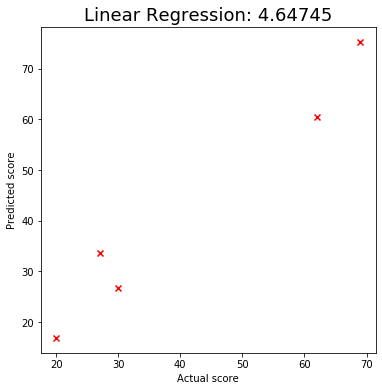

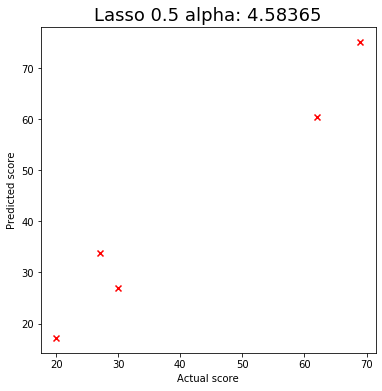

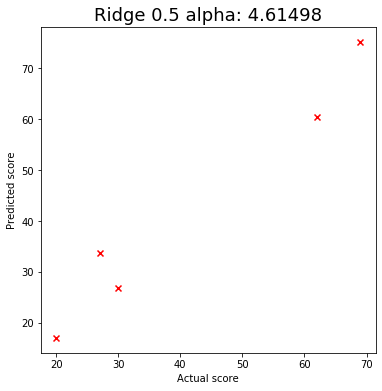

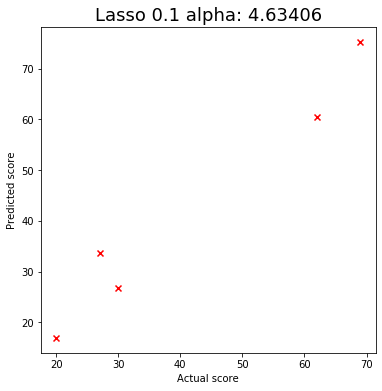

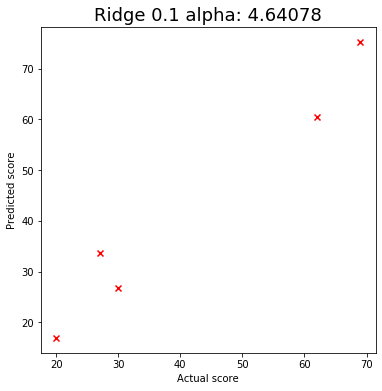

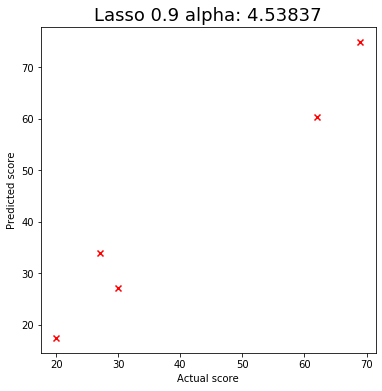

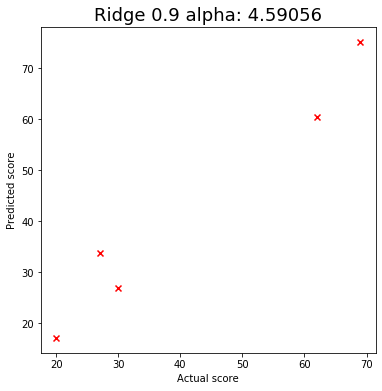

In [26]:
model_names = ['Linear Regression', 'Lasso 0.5 alpha', 'Ridge 0.5 alpha',
              'Lasso 0.1 alpha', 'Ridge 0.1 alpha', 'Lasso 0.9 alpha',
              'Ridge 0.9 alpha']

models = [
    LinearRegression(),
    Lasso(alpha=0.5),
    Ridge(alpha=0.5),
    Lasso(alpha=0.1),
    Ridge(alpha=0.1),
    Lasso(alpha=0.9),
    Ridge(alpha=0.9)
]

for name, model in zip(model_names, models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_results(name, y_test, y_pred)

Since the Lasso model with alpha 0.9 is the best fit i.e., has least mean squared error, we take it to be the final model.

In [8]:
model = Lasso(alpha=0.9)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.428946
1,27,34.029425
2,69,75.042373
3,30,27.193934
4,62,60.394892


Predicting for 9.25 hours

In [9]:
hours = [[9.25]]
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.10760067331347


Plotting regressing line, predicted score for 9.25 hours, and given data

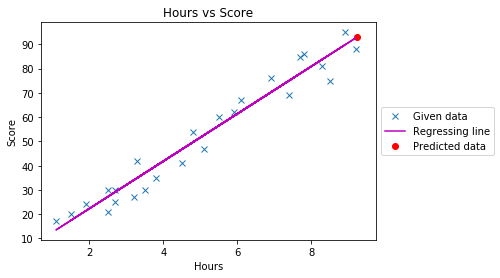

In [15]:
line = model.coef_ * X + model.intercept_
data.plot(x='Hours', y='Scores', style='x', label='Given data')
plt.scatter(hours, own_pred[0], color='r', marker='o', label='Predicted data')
plt.plot(X, line, color='m', label='Regressing line')
plt.title('Hours vs Score')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()